Загрузите данные и сформируете датасет. Выполните минимум две аугментации. Соберите сверточную нейронную сеть с помощью фреймворка Tensorflow и решите задачу классификации кошек и собак. Оцените модель. Будьте готовы ответить на вопросы:
- какие этапы предварительной обработки данных вы делаете и что происходит с данными?
- что означают параметры, которые вы задаете?
- какие слои у вас есть и что происходит на каждом слое?

In [1]:
import tensorflow as tf

train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/data3",
    validation_split=0.2,
    subset="both",
    seed=42,
    image_size=(200,200),
    batch_size=32,
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


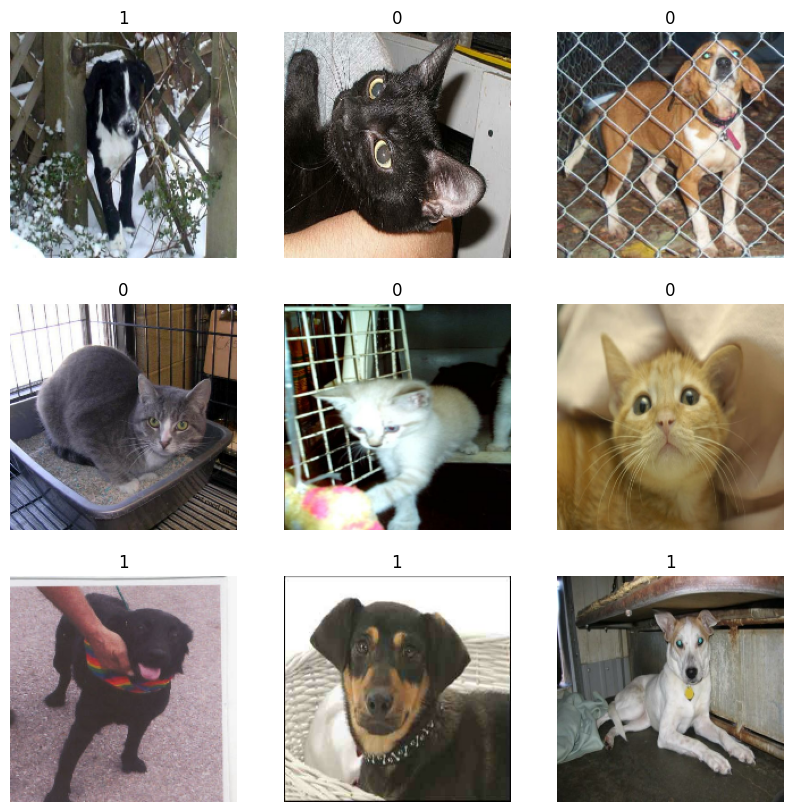

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [3]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

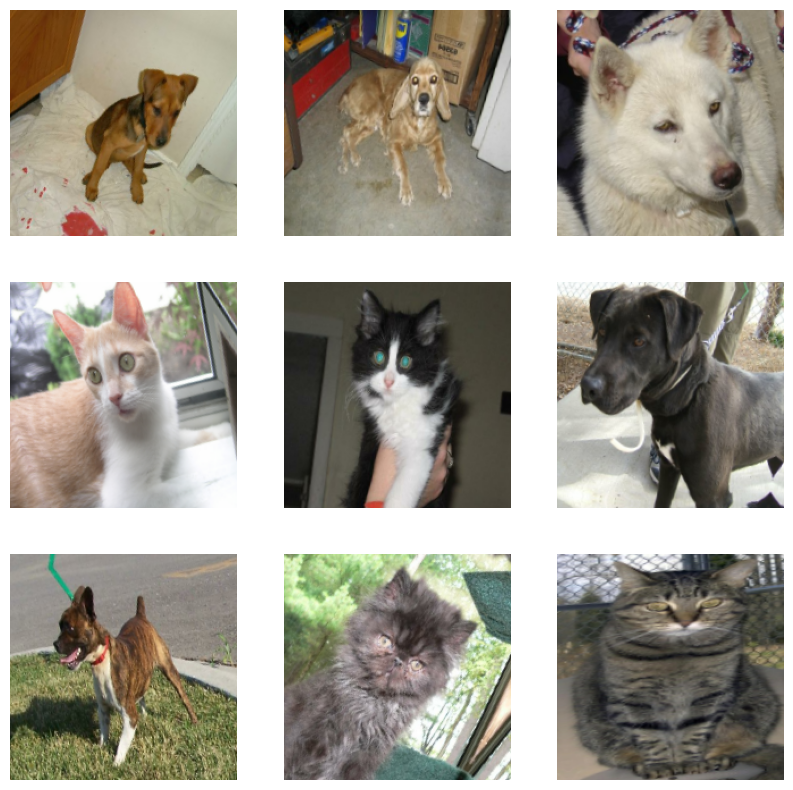

In [4]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [5]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [6]:
# входной слой - размер (200, 200, 3)
inputs = tf.keras.Input(shape=(200, 200, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same", activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same", activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 128)       131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                         

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
50/50 [==============================] - 147s 3s/step - loss: 0.7705 - accuracy: 0.5462 - val_loss: 0.6729 - val_accuracy: 0.6175
Epoch 2/10
50/50 [==============================] - 170s 3s/step - loss: 0.6618 - accuracy: 0.6212 - val_loss: 0.6223 - val_accuracy: 0.6400
Epoch 3/10
50/50 [==============================] - 165s 3s/step - loss: 0.6408 - accuracy: 0.6488 - val_loss: 0.6970 - val_accuracy: 0.5225
Epoch 4/10
50/50 [==============================] - 150s 3s/step - loss: 0.6828 - accuracy: 0.5669 - val_loss: 0.6148 - val_accuracy: 0.6475
Epoch 5/10
50/50 [==============================] - 109s 2s/step - loss: 0.6503 - accuracy: 0.6075 - val_loss: 0.6899 - val_accuracy: 0.5650
Epoch 6/10
50/50 [==============================] - 99s 2s/step - loss: 0.6615 - accuracy: 0.6019 - val_loss: 0.6914 - val_accuracy: 0.5950
Epoch 7/10
50/50 [==============================] - 87s 2s/step - loss: 0.6072 - accuracy: 0.6825 - val_loss: 0.5931 - val_accuracy: 0.6850
Epoch 8/10
50/5

In [12]:
img = tf.keras.preprocessing.image.load_img(
    "../data/data3/cats/2.jpg", target_size=(200, 200)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 423ms/step


array([[0.8247379 , 0.17526211]], dtype=float32)

In [13]:
model.save('../models/CatsDogsModel')

INFO:tensorflow:Assets written to: ../models/CatsDogsModel\assets


INFO:tensorflow:Assets written to: ../models/CatsDogsModel\assets


4. Загрузите модели InceptionV3 и VGG19 с помощью Tensorflow. Выполните transfer learning и fine-tuning этих моделей для распознавания выбранных на 2 пункте классов. В процессе подготовки сетей, разморозьте какой-либо еще слой, кроме последнего. Сравните результаты двух сетей на ваших данных (по метрике accuracy в процессе обучения).

5. Используйте реализацию многослойного персептрона из ЛР 4. Реализуйте сверточный слой (прямое и обратное распространение). Соберите сверточную сеть. Попробуйте обучить классификатор кошек и собак с использованием собственной реализации сверточной нейронной сети. Вам также потребуется реализовать слой для преобразования многомерных массивов данных в одномерные.

In [14]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/101_ObjectCategories",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(224,224), 
    batch_size=32, 
)

Found 216 files belonging to 3 classes.
Using 173 files for training.
Using 43 files for validation.


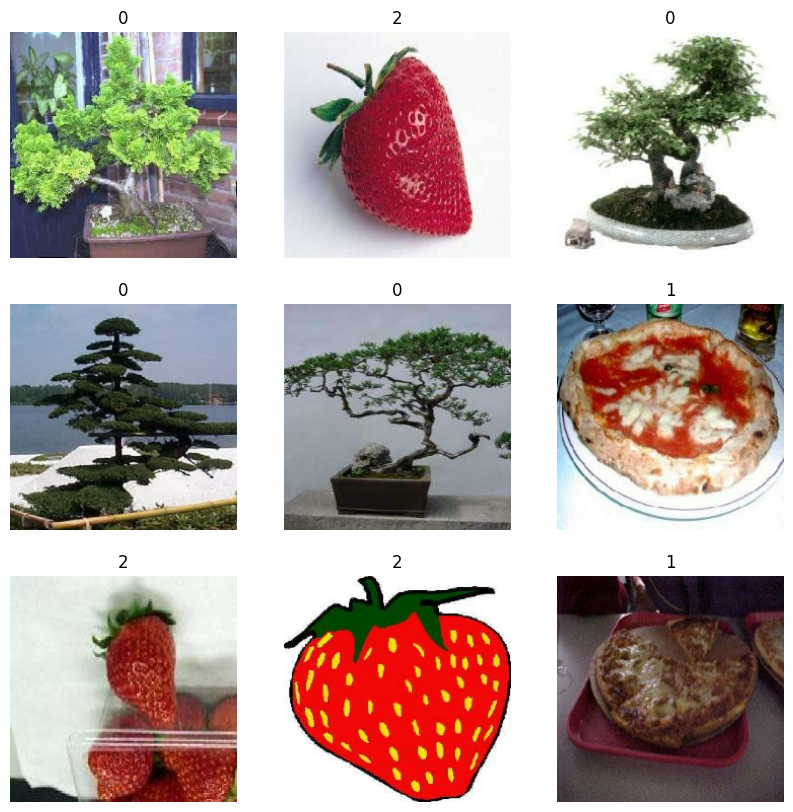

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [21]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)

574710816/574710816 [==============================] - 155s 0us/step


In [22]:
inp = vgg.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model_new = tf.keras.Model(inp, out)

In [23]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True
model_new.layers[-2].trainable = True

In [24]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history_1 = model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
6/6 [==============================] - 326s 54s/step - loss: 10.2753 - accuracy: 0.7919 - val_loss: 1.7428 - val_accuracy: 0.9535
Epoch 2/5
6/6 [==============================] - 335s 57s/step - loss: 3.1183 - accuracy: 0.9480 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
6/6 [==============================] - 343s 59s/step - loss: 0.3411 - accuracy: 0.9827 - val_loss: 8.3169e-08 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 344s 57s/step - loss: 0.0520 - accuracy: 0.9942 - val_loss: 0.5070 - val_accuracy: 0.9535
Epoch 5/5
6/6 [==============================] - 322s 54s/step - loss: 1.2842e-04 - accuracy: 1.0000 - val_loss: 3.3908e-05 - val_accuracy: 1.0000


In [28]:
img = tf.keras.preprocessing.image.load_img(
    "../data/101_ObjectCategories/bonsai/image_0061.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 7s 7s/step


array([[1., 0., 0.]], dtype=float32)

In [29]:
inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)

96112376/96112376 [==============================] - 27s 0us/step


In [30]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/101_ObjectCategories",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(299,299), 
    batch_size=32, 
)

Found 216 files belonging to 3 classes.
Using 173 files for training.
Using 43 files for validation.


In [31]:
inp = inception.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(inception.layers[-2].output)
model_new2 = tf.keras.Model(inp, out)

In [32]:
for layer in model_new2.layers:
    layer.trainable = False
model_new2.layers[-1].trainable = True
model_new2.layers[-2].trainable = True

In [33]:
model_new2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history_2 = model_new2.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
6/6 [==============================] - 133s 20s/step - loss: 10.7905 - accuracy: 0.4624 - val_loss: 6.9808 - val_accuracy: 0.4186
Epoch 2/5
6/6 [==============================] - 102s 17s/step - loss: 4.6547 - accuracy: 0.5780 - val_loss: 4.7858 - val_accuracy: 0.5814
Epoch 3/5
6/6 [==============================] - 97s 17s/step - loss: 3.0222 - accuracy: 0.6416 - val_loss: 3.5610 - val_accuracy: 0.6279
Epoch 4/5
6/6 [==============================] - 100s 17s/step - loss: 2.3022 - accuracy: 0.7225 - val_loss: 3.5819 - val_accuracy: 0.6047
Epoch 5/5
6/6 [==============================] - 108s 18s/step - loss: 1.3566 - accuracy: 0.7977 - val_loss: 3.7591 - val_accuracy: 0.6512


In [36]:
img = tf.keras.preprocessing.image.load_img(
    "../data/101_ObjectCategories/bonsai/image_0061.jpg", target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new2.predict(img_array)
predictions

1/1 [==============================] - 3s 3s/step


array([[8.2948285e-01, 1.7027396e-01, 2.4328387e-04]], dtype=float32)

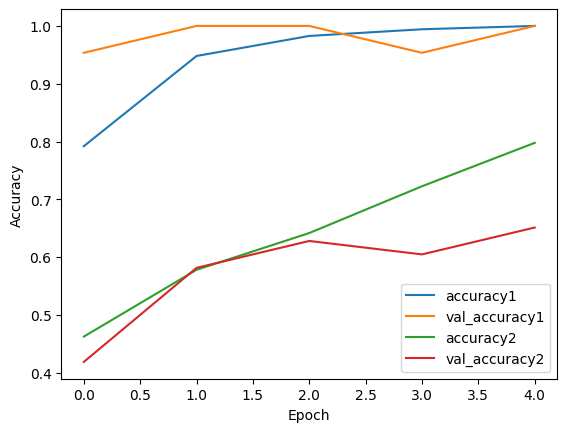

In [37]:
plt.plot(history_1.history['accuracy'], label='accuracy1')
plt.plot(history_1.history['val_accuracy'], label = 'val_accuracy1')
plt.plot(history_2.history['accuracy'], label='accuracy2')
plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy2')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')